# The math of Intelligence
lectured by Siraj Raval
## Intro : Simple Linear regression

### Simple Linear regression
$
Hypothesis : Y_i=wx_i+b+\epsilon_i, \\ \quad \quad \quad \quad \ \ \ \epsilon_i \sim N(0,\sigma^2), \ Y_i \sim N(E(Y_i|X = x_i), \sigma^2) \\
Conditional \ Expectation : E(Y_i|X = x_i) = wx_i+b \\
Loss \ function : L = \frac{1}{n}\sum_{i=1}^n (y_i - E(Y_i|X = x_i))^2= \frac{1}{n}\sum_{i=1}^n (y_i - wx_i - b)^2 \\    
Partial \ derivative : \frac{\partial L}{\partial w}=-\frac{2}{n} \sum_{i=1}^n x_i (y_i - wx_i - b),\quad  
\frac{\partial L}{\partial b}=-\frac{2}{n} \sum_{i=1}^n (y_i - wx_i - b)  \\
Gradient \ descent : w \leftarrow w - \lambda \frac{\partial L}{\partial w},\quad  
b \leftarrow b - \lambda \frac{\partial L}{\partial b}
$

## Code templeate 

### Importing modules

In [1]:
import os, sys
import numpy as np

### Importing data

In [2]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'data.csv',
 'demo.py',
 'Intro.ipynb',
 'LICENSE',
 'README.md']

In [3]:
data = np.loadtxt('./data.csv', delimiter=',')
data.shape

(100, 2)

In [4]:
data[:5]

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513]])

### Define function

In [5]:
def calculate_loss(current_w, current_b, points):
    return np.mean(np.square(points[:,1] - points[:,0] * current_w - current_b))

In [6]:
# not mini-batch
def step_gradient(current_w, current_b, points, learning_rate):
    dw = 0
    db = 0
    n = points.shape[0]
    for point in points:
        x = point[0]
        y = point[1]
        dw += - (2 / n) * x * (y - current_w * x - current_b)
        db += - (2 / n) * (y - current_w * x - current_b)
    updated_w = current_w - learning_rate * dw
    updated_b = current_b - learning_rate * db
    return [updated_w, updated_b]

In [7]:
def gradient_descent_runner(points, initial_w, initial_b, learning_rate, num_iterations):
    w = initial_w
    b = initial_b
    for i in range(num_iterations):
        w, b = step_gradient(w, b, points, learning_rate)
    return [w, b]

### Training

In [8]:
def run():
    points = data
    learning_rate = .0004
    initial_w = 0 # initial y-intercept guess
    initial_b = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at w = {:.3f}, b = {:.3f}, error = {:.3f}".format(initial_w, initial_b,
                                                                           calculate_loss(initial_w, initial_b, points)))
    print("Running...")
    [w, b] = gradient_descent_runner(points, initial_w, initial_b, learning_rate, num_iterations)
    print("After {:3} iterations w = {:.3f}, b = {:.3f}, error = {:.3f}".format(num_iterations, w, b,
                                                                      calculate_loss(w, b, points)))
    return w, b
if __name__ == '__main__':
    w, b = run()

Starting gradient descent at w = 0.000, b = 0.000, error = 5565.108
Running...
After 1000 iterations w = 1.472, b = 0.266, error = 112.523


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

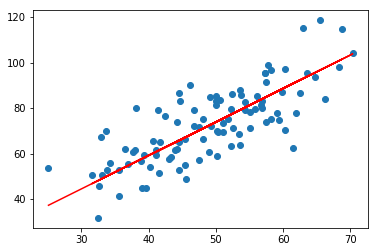

In [10]:
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], w * data[:,0] + b, 'r-')